<a href="https://colab.research.google.com/github/TejoVK/Covid19Prediction/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd #with pandas we can load csv files

In [46]:
covid = pd.read_csv('/content/covid.csv') # I now loaded the file and stored it in an object named covid

In [47]:
covid.head() # it gives the info present in the first 5 rows of the data set

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
0,1,03-12-2019,India,74,71,3,0
1,2,04-12-2019,India,75,71,3,1
2,3,05-12-2019,India,84,72,10,2
3,4,06-12-2019,India,107,95,10,2
4,5,07-12-2019,India,114,99,13,2


In [48]:
covid.shape # .shape tellsus the shape of the dataset i.e no. of rows and columns

(629, 7)

In [49]:
covid.columns

Index(['S.No', 'Date', 'Region', 'Confirmed_Cases', 'Active_Cases',
       'Cured/Discharged', 'Death'],
      dtype='object')

In [50]:
covid["Region"].value_counts() #looking the number of values for India 

India    629
Name: Region, dtype: int64

In [51]:
covid.describe(include='O') # tells us about the catagorical columns

,Date,Region
count,629,629
unique,629,1
top,25-02-2021,India
freq,1,629


In [52]:
covid.isna().any() # Gives bolean value ,to check whether any column has any free values

S.No                False
Date                False
Region              False
Confirmed_Cases     False
Active_Cases        False
Cured/Discharged    False
Death               False
dtype: bool

In [53]:
covid.isna().sum()
#tells us the numer of null values in each column, in our case it's 0

S.No                0
Date                0
Region              0
Confirmed_Cases     0
Active_Cases        0
Cured/Discharged    0
Death               0
dtype: int64

In [54]:
covid.tail()# it gives the info present in the last 5 rows of the data set

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
624,625,18-08-2021,India,34540275,83913,34178940,477422
625,626,19-08-2021,India,34546838,82267,34187017,477554
626,627,20-08-2021,India,34697860,91456,34130768,475636
627,628,21-08-2021,India,34703644,88993,34138763,475888
628,629,22-08-2021,India,34710628,87562,34146931,476135


In [55]:
import seaborn as sns
#seaborn is a visualisation library i.e based on matplotlib and from matplotlib we are importing pyplot library
from matplotlib import pyplot as plt  #pyplot is a submodule of mathplotlib

Seaborn is one of the world’s most regarded Python libraries that is purpose-built to create beautiful-looking visualizations. It can be considered as an extension of another library called Matplotlib as it is built on top of that. Referrence-> Intellipaat

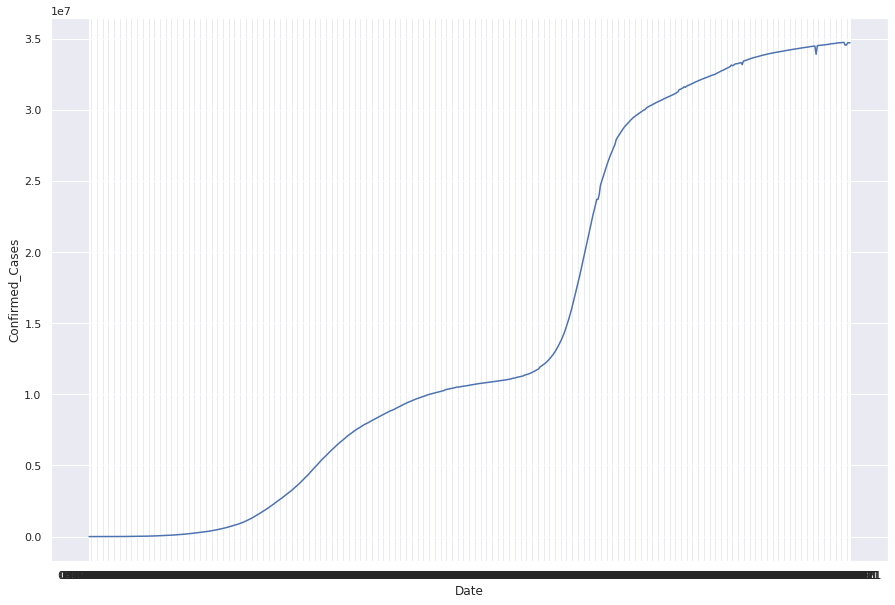

In [56]:
#total confirmed cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Confirmed_Cases",data=covid)
plt.show()

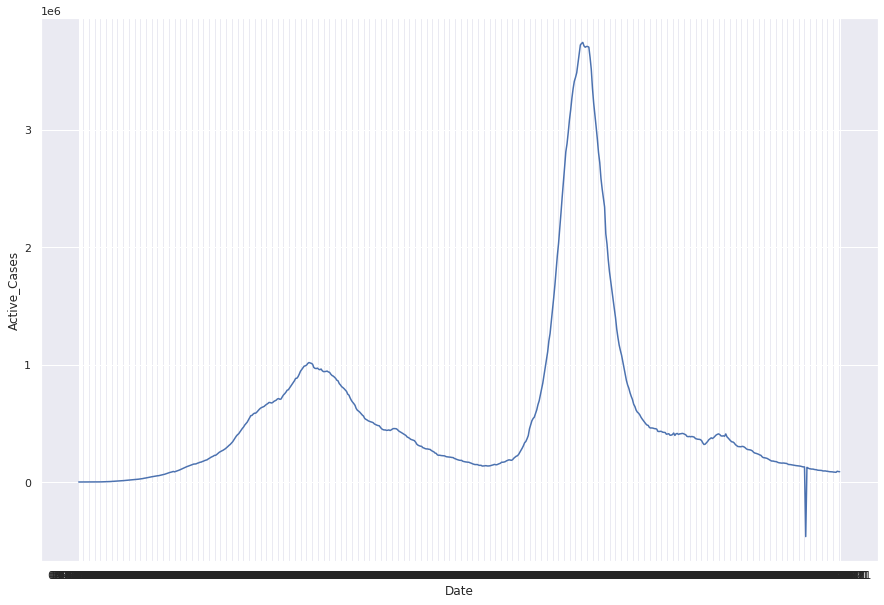

In [57]:
#total active cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Active_Cases",data=covid)
plt.show()

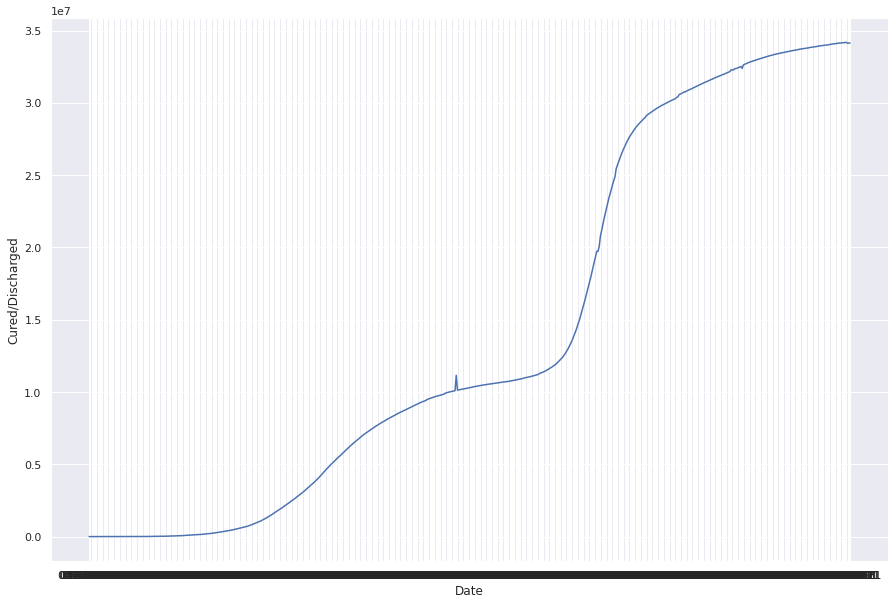

In [58]:
#total cured cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Cured/Discharged",data=covid)
plt.show()

In [59]:
covid_last_5_days=covid.tail() 
#checking the graph for last five days

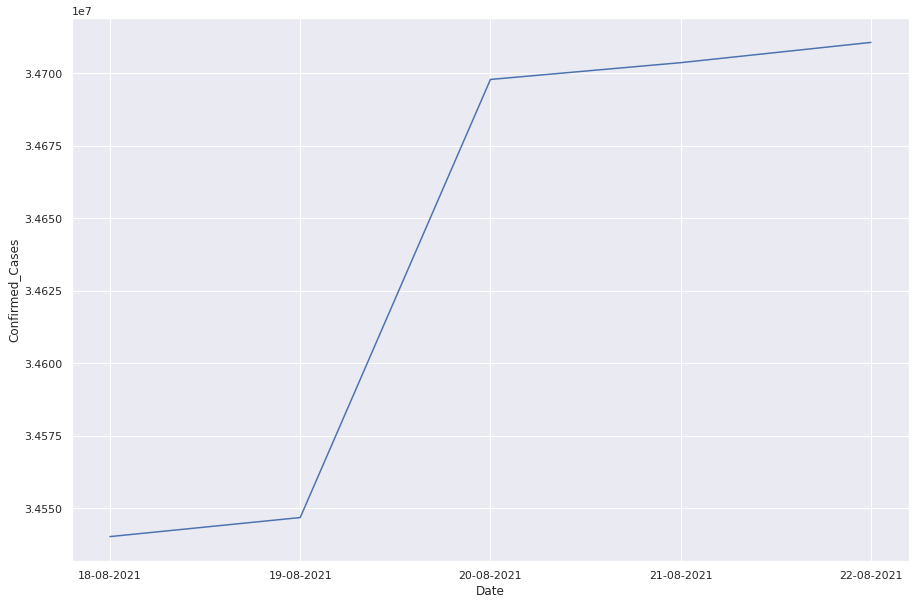

In [60]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Confirmed_Cases",data=covid_last_5_days)
plt.show()

In [61]:
covid.head()

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
0,1,03-12-2019,India,74,71,3,0
1,2,04-12-2019,India,75,71,3,1
2,3,05-12-2019,India,84,72,10,2
3,4,06-12-2019,India,107,95,10,2
4,5,07-12-2019,India,114,99,13,2


In [62]:
from sklearn.model_selection import train_test_split # Before building our model we have to split our data to traing and testing set, we have to train our ML model first

In [63]:
import datetime as dt
covid['Date'] = pd.to_datetime(covid['Date']) 
covid.head()

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
0,1,2019-03-12,India,74,71,3,0
1,2,2019-04-12,India,75,71,3,1
2,3,2019-05-12,India,84,72,10,2
3,4,2019-06-12,India,107,95,10,2
4,5,2019-07-12,India,114,99,13,2


In [64]:
covid['Date'] = covid['Date'].map(dt.datetime.toordinal) # we can observe the date column is a string so we need to convet it to a ordinal value
covid.head()

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
0,1,737130,India,74,71,3,0
1,2,737161,India,75,71,3,1
2,3,737191,India,84,72,10,2
3,4,737222,India,107,95,10,2
4,5,737252,India,114,99,13,2


In [65]:
x = covid['Date']
y = covid['Confirmed_Cases'] # so over here i start the procedure to predict the cases wrt the date
# this means over here the dependent variable is activecases and the independent variable is the date 

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3) # using train_test_split method to split the data to training and testing 

In [67]:
from sklearn.linear_model import LinearRegression #importing LR algorithm from Linear Regression model

In [68]:
lr = LinearRegression()# storing it's instance into an object called as lr

In [69]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [70]:
covid.tail()

,S.No,Date,Region,Confirmed_Cases,Active_Cases,Cured/Discharged,Death
624,625,738020,India,34540275,83913,34178940,477422
625,626,738021,India,34546838,82267,34187017,477554
626,627,738022,India,34697860,91456,34130768,475636
627,628,738023,India,34703644,88993,34138763,475888
628,629,738024,India,34710628,87562,34146931,476135


In [71]:
y_pred = lr.predict(np.array(x_test).reshape(-1,1))

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mean_squared_error(x_test,y_pred)

324486729773830.0

In [74]:
lr.predict(np.array([[738024]])).astype(int)

array([[32660544]])

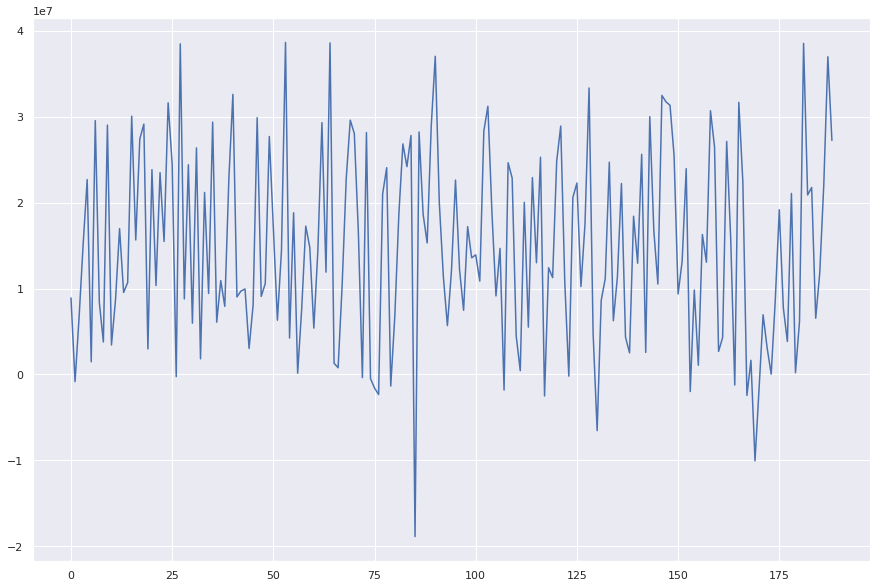

In [75]:
plt.plot(y_pred)